In [10]:
import numpy as np

# Question 1

$L(C,N,\lambda) = (\alpha C^p + (1-a)N^p)^{\frac{1}{p}} - \lambda(p_C C + p_N N -I)$

$C^* = \frac{I}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}}$

$N^* = \frac{I}{P_N + P_C(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{\frac{1}{p - 1}}}$

In [11]:
I = 100
PN = 1
PC = 2
alpha = 0.7
p = 0.5

In [12]:
def C_star(I, PN, PC, alpha = 0.7, p = 0.5):
    denominateur = PN*(PC/PN*(1-alpha)/alpha)**(-1/(p-1)) + PC

    return I/denominateur

def N_star(I, PN, PC, alpha = 0.7, p = 0.5):
    denominateur = PC*(PC/PN*(1-alpha)/alpha)**(1/(p-1)) + PN

    return I/denominateur

In [13]:
C_rep = C_star(I, PN, PC, alpha, p)
N_rep = N_star(I, PN, PC, alpha, p)

print(f'''
    La quantité demandée de bien a forte intensité de carbone (C) est de
    {round(C_rep, 2)} et celle des autres biens (N) est à {round(N_rep,2)}.
''')


    La quantité demandée de bien a forte intensité de carbone (C) est de
    36.57 et celle des autres biens (N) est à 26.87.



# Question 2

$\begin{aligned}
\eta_{C,I} = \frac{dC}{dI} \frac{I}{C}
\end{aligned}$

$\eta_{C,I} = \frac{1}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}}
\frac{I}{\frac{I}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}}}$

$\begin{aligned}
\eta_{C,I} = 1 \end{aligned}$



In [14]:
def Share(I, PN, PC, alpha = 0.7, p = 0.5, C = True):
    if C:
        nominateur = PC*C_star(I, PN, PC, alpha = 0.7, p = 0.5)
    
    else:
        nominateur = PN*N_star(I, PN, PC, alpha = 0.7, p = 0.5)
    
    return nominateur/I


In [15]:
C_part = Share(I, PN, PC, alpha, p, C = True)
N_part = Share(I, PN, PC, alpha, p, C = False)

print(f'''
    La part des biens à forte intensité de carbone (C) est de {round(C_part, 4)*100}%
    la part des autres biens (N) est de {round(N_part, 4)*100}%.
''')



    La part des biens à forte intensité de carbone (C) est de 73.13%
    la part des autres biens (N) est de 26.87%.



On remarque que les proportions sont très près de $\alpha$ et $\alpha - 1$, pour $C$ et $N$ respectivement. Cela est cohérent avec le fait que les demandes marshaliennes soient tirées d'une fonction d'utilité Cobb-Douglas et que leur élasticité revenu soit égale à 1 ce qui implique que les part sont fixes pour chaque bien dans le budget

# Question 3

## (a)

In [16]:
gamma = 0.1
PC_taxe = PC * (1+gamma)

qteC = C_star(I, PN, PC_taxe, alpha, p)
qteN = N_star(I, PN, PC_taxe, alpha, p)

C_part_taxe = Share(I, PN, PC_taxe, alpha, p)
N_part_taxe = Share(I, PN, PC_taxe, alpha, p, False)

print(f'''
    En incluant une taxe carbone, les biens à forte intensité de carbone représentent {round(C_part_taxe,4)*100}% soit environ {int(round(qteC, 0))} unités,
    les autres biens représentent désormais {round(N_part_taxe,4)*100}% soit environ {int(round(qteN, 0))} unités.
''')


    En incluant une taxe carbone, les biens à forte intensité de carbone représentent 71.22% soit environ 32 unités,
    les autres biens représentent désormais 28.78% soit environ 29 unités.



## (b)

In [17]:
deltaC = C_part_taxe - C_part

print(f'La proportion des biens à forte intensité de carbone augmente de {round(deltaC, 4)*100}% dans le budget')

La proportion des biens à forte intensité de carbone augmente de -1.91% dans le budget


## (c)

In [18]:
import matplotlib.pyplot as plt

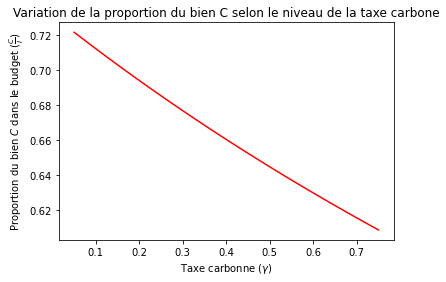

In [19]:
X = np.linspace(0.05, 0.75)
y = [Share(I, PN, PC * (1+gamma), alpha, p) for gamma in X]

plt.plot(X, y, 'r-')
plt.title('Variation de la proportion du bien C selon le niveau de la taxe carbone')
plt.xlabel(r'Taxe carbonne ($\gamma$)')
plt.ylabel(r'Proportion du bien $C$ dans le budget ($\frac{C}{I}$)')
plt.show()

Ceci est cohérent avec le fait que la fonction d'utilité est de type "Cobb-Douglas", en effet cela veux dire que son élasticité prix est de 1. C'est pourquoi la relation entre la taxe carbone et la proportion du bien C dans le budget est linéaire.

# Question 4

In [20]:
def v(I, PC, PN, alpha = 0.7, p = 0.5):
    return (alpha*C_star(I, PN, PC, alpha, p)**p + (1-alpha)*N_star(I, PN, PC, alpha, p)**p)**(1/p)



In [21]:
def slack(cmp, PC, PN, I, alpha, PC_taxe):
    return v(I, PC, PN, alpha, p) - v(I+cmp, PC_taxe, PN, alpha, p)

In [22]:
from scipy.optimize import bisect

In [44]:
cmp = bisect(slack, 0, 200, args=(PC, PN, I, alpha, PC_taxe))

In [28]:
def compens(PC, PC_taxe, PN, I, alpha):
    return bisect(slack, 0, I, args=(PC, PN, I, alpha, PC_taxe))

In [29]:
cmp = compens(PC, PC_taxe, PN, I, alpha)

7.122093023257037

In [30]:
slack(compens(PC, PC_taxe, PN, I, alpha), PC, PN, I, alpha, PC_taxe)

-3.836930773104541e-13

Text(0, 0.5, 'Compensation ($cmp$)')

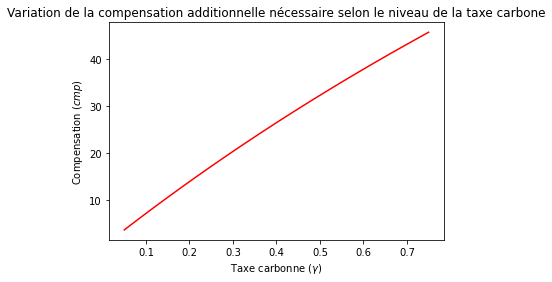

In [40]:

y = [compens(PC, PC*(1+gamma), PN, I, alpha) for gamma in X]

plt.plot(X, y, 'r-')
plt.title('Variation de la compensation additionnelle nécessaire selon le niveau de la taxe carbone')
plt.xlabel(r'Taxe carbonne ($\gamma$)')
plt.ylabel(r'Compensation ($cmp$)')

In [47]:
util_initiale = v(I, PC, PN)
util_finale = v(I+cmp, PC_taxe, PN)
print(util_initiale - util_finale)

-3.836930773104541e-13


L'utilité initiale et l'utilité après la compensation sont égales ce qui démontre que la compensation annule l'effet de la taxe carbone

# Question 5

### <i>Rappel</i>:

$\begin{aligned}
\eta_{C,I} = \frac{dC}{dI} \frac{I}{C}
\end{aligned}$

$\eta_{C,I} = \frac{1}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}}
\frac{I}{\frac{I}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}}}$

$\begin{aligned}
\eta_{C,I} = 1 \end{aligned}$

In [62]:
C_cmp = C_star(I+cmp, PN, PC*(1+gamma))

In [63]:
N_cmp = C_star(I, PN, PC*(1))

In [65]:
(C_cmp-N_cmp)/N_cmp

-0.05164108977824778

Lorsque la compensation est versée, la demande de biens a forte intensité carbone diminue de 5,16%, ce qui signifie que les émissions de carbone seront réduites de 5,16% également. 

# <a style='color:red'>Question 6</a>

In [71]:
prod_gouv = C_cmp*PC*gamma 
charge_gouv = cmp

impact_net = prod_gouv - charge_gouv
impact_net

-0.18633382909795415

Lorsque le gouvernement impose la taxe $\gamma$, son revenu net diminue d'environ 0.19$ par consommateur. Cela est dû au fait que le gouvernement doit aussi compenser le consommateur afin que ce dernier garde son utilité constante. L'effet net de la taxe sur le revenu du gouvernement est donc négatif.

# <a style='color:red'>Question 7</a>

In [ ]:
def C_star(I, PN, PC, alpha = 0.7, p = 0.5):
    denominateur = PN*(PC/PN*(1-alpha)/alpha)**(-1/(p-1)) + PC

    return I/denominateur

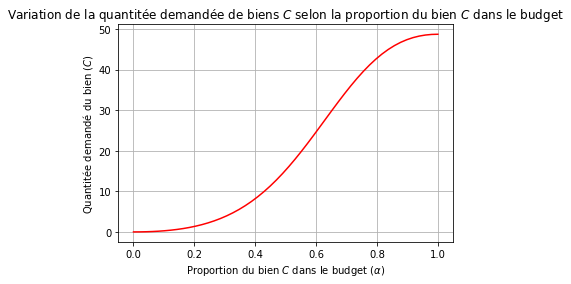

In [102]:
X = np.linspace(0.0001, 1)
y = [C_star(I+cmp, PN, PC*(1+gamma), alpha, p) for alpha in X]

plt.plot(X, y, 'r')

plt.title(r'Variation de la quantitée demandée de biens $C$ selon la proportion du bien $C$ dans le budget')
plt.xlabel(r'Proportion du bien $C$ dans le budget ($\alpha$)')
plt.ylabel(r'Quantitée demandé du bien ($C$)')

plt.grid(True)


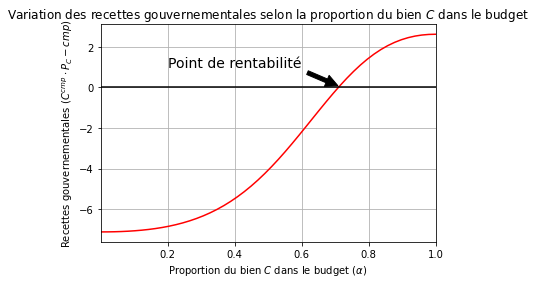

In [113]:
y_2 = [C_star(I+cmp, PN, PC*(1+gamma), alpha, p)*PC*gamma - cmp for alpha in X]

plt.plot(X, y_2, 'r')

plt.plot([-1, 1.5], [0, 0], c='black')

plt.xlim(X.min(), X.max())

plt.title(r'Variation des recettes gouvernementales selon la proportion du bien $C$ dans le budget')
plt.xlabel(r'Proportion du bien $C$ dans le budget ($\alpha$)')
plt.ylabel(r'Recettes gouvernementales ($C^{cmp} \cdot P_C - cmp$)')

props = dict(facecolor='black', shrink=0.1)
plt.annotate('Point de rentabilité', xytext=(0.4, 1), xy=(0.72, 0), arrowprops=props, fontsize=14, ha="center")

plt.grid(True)


Lorsque $\alpha$ augmente, ce qui signifie que la part du bien à forte intensité carbone dans le budget des consommateurs augmente, les émissions de carbone augmentent, car les consommateurs consomment plus du bien carbone pour le même budget.

Le revenu net du gouvernement augmente lorsqu’alpha augmente, car leurs revenus de la taxes augmentent puisque la consommation du bien carbone augmente, alors que leurs dépenses de compensation augmentent moins